In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
train = pd.read_csv('train.csv',index_col='Id')
test = pd.read_csv('test.csv',index_col='Id')

In [3]:
na_counts_train = train.isnull().sum()
na_counts_train[na_counts_train != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [4]:
na_counts_test = test.isnull().sum()
na_counts_test[na_counts_test != 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [5]:
bsmt_cols = [col for col in test.columns if 'Bsmt' in col]
test[test['BsmtHalfBath'].isnull()][bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2189,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN


In [6]:
garage_cols = [col for col in test.columns if 'Garage' in col]
test[test['GarageFinish'].notnull() & test['GarageType'].notnull()][garage_cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
1461,Attchd,1961.0,Unf,1.0,730.0,TA,TA
1462,Attchd,1958.0,Unf,1.0,312.0,TA,TA
1463,Attchd,1997.0,Fin,2.0,482.0,TA,TA
1464,Attchd,1998.0,Fin,2.0,470.0,TA,TA
1465,Attchd,1992.0,RFn,2.0,506.0,TA,TA
...,...,...,...,...,...,...,...
2912,Attchd,1969.0,RFn,1.0,336.0,TA,TA
2913,CarPort,1970.0,Unf,1.0,286.0,TA,TA
2916,CarPort,1970.0,Unf,1.0,286.0,TA,TA


In [7]:
class DataCleaner:
    
    
    def __init__(self, train, test):
        self.train = train.copy()
        self.test = test.copy()
        
    
    def cleanAlley(self):
        self.train.loc[:,'Alley'] = self.train['Alley'].fillna('No_Alley_Access')
        self.test.loc[:,'Alley'] = self.test['Alley'].fillna('No_Alley_Access')
    
    
    def cleanBsmt(self):
        self.cleanBsmtQual()
        self.cleanBsmtCond()
        self.cleanBsmtExposure()
        self.cleanBsmtFinType1()
        self.cleanBsmtFinType2()
        self.cleanBsmtFinSF1()
        self.cleanBsmtFinSF2()
        self.cleanBsmtUnfSF()
        self.cleanTotalBsmtSF()
        self.cleanBsmtFullBath()
        self.cleanBsmtHalfBath()
    
    def cleanBsmtQual(self):
        self.train.loc[:,'BsmtQual'] = self.train['BsmtQual'].fillna('No_Basement')
        self.test.loc[:,'BsmtQual'] = self.test['BsmtQual'].fillna('No_Basement')
        
        
    def cleanBsmtCond(self):
        self.train.loc[:,'BsmtCond'] = self.train['BsmtCond'].fillna('No_Basement')
        self.test.loc[:,'BsmtCond'] = self.test['BsmtCond'].fillna('No_Basement')
        
    
    def cleanBsmtExposure(self):
        self.train.loc[:,'BsmtExposure'] = self.train['BsmtExposure'].fillna('No_Basement')
        self.test.loc[:,'BsmtExposure'] = self.test['BsmtExposure'].fillna('No_Basement')
        
        
    def cleanBsmtFinType1(self):
        self.train.loc[:,'BsmtFinType1'] = self.train['BsmtFinType1'].fillna('No_Basement')
        self.test.loc[:,'BsmtFinType1'] = self.test['BsmtFinType1'].fillna('No_Basement')

        
    def cleanBsmtFinType2(self):
        self.train.loc[:,'BsmtFinType2'] = self.train['BsmtFinType2'].fillna('No_Basement')
        self.test.loc[:,'BsmtFinType2'] = self.test['BsmtFinType2'].fillna('No_Basement')
        
        
    def cleanBsmtFinSF1(self):

        self.train.loc[:,'BsmtFinSF1'] = self.train['BsmtFinSF1'].fillna(0)
        self.test.loc[:,'BsmtFinSF1'] = self.test['BsmtFinSF1'].fillna(0)

        
    def cleanBsmtFinSF2(self):
        self.train.loc[:,'BsmtFinSF2'] = self.train['BsmtFinSF2'].fillna(0)
        self.test.loc[:,'BsmtFinSF2'] = self.test['BsmtFinSF2'].fillna(0)
        

    def cleanBsmtUnfSF(self):
        self.train.loc[:,'BsmtUnfSF'] = self.train['BsmtUnfSF'].fillna(0)
        self.test.loc[:,'BsmtUnfSF'] = self.test['BsmtUnfSF'].fillna(0)
        
        
    def cleanTotalBsmtSF(self):
        self.train.loc[:,'TotalBsmtSF'] = self.train['TotalBsmtSF'].fillna(0)   
        self.test.loc[:,'TotalBsmtSF'] = self.test['TotalBsmtSF'].fillna(0)
        
        
    def cleanBsmtFullBath(self):
        self.train.loc[:,'BsmtFullBath'] = self.train['BsmtFullBath'].fillna(0)
        self.test.loc[:,'BsmtFullBath'] = self.test['BsmtFullBath'].fillna(0)
        
    def cleanBsmtHalfBath(self):
        self.train.loc[:,'BsmtHalfBath'] = self.train['BsmtHalfBath'].fillna(0)
        self.test.loc[:,'BsmtHalfBath'] = self.test['BsmtHalfBath'].fillna(0)
    
    
    def cleanFireplaceQu(self):
        self.train.loc[:,'FireplaceQu'] = self.train['FireplaceQu'].fillna('No_Fireplace')
        self.test.loc[:,'FireplaceQu'] = self.test['FireplaceQu'].fillna('No_Fireplace')
    
    
    def cleanGarage(self):
        self.cleanGarageType()
        self.cleanGarageYrBlt()
        self.cleanGarageFinish()
        self.cleanGarageQual()
        self.cleanGarageCond()
        self.cleanGarageCars()
        self.cleanGarageArea()
        
        
    def cleanGarageType(self):
        self.train.loc[:,'GarageType'] = self.train['GarageType'].fillna('No_Garage')
        self.test.loc[:,'GarageType'] = self.test['GarageType'].fillna('No_Garage')
        
        
    def cleanGarageYrBlt(self):
        self.train.loc[:,'GarageYrBlt'] = self.train['GarageYrBlt'].fillna('No_Garage')
        self.test.loc[:,'GarageYrBlt'] = self.test['GarageYrBlt'].fillna('No_Garage')
        
        
    def cleanGarageFinish(self):
        self.train.loc[:,'GarageFinish'] = self.train['GarageFinish'].fillna('No_Garage')
        self.test.loc[:,'GarageFinish'] = self.test['GarageFinish'].fillna('No_Garage')
        
        
    def cleanGarageQual(self):
        self.train.loc[:,'GarageQual'] = self.train['GarageQual'].fillna('No_Garage')        
        self.test.loc[:,'GarageQual'] = self.test['GarageQual'].fillna('No_Garage')
        
          
    def cleanGarageCond(self):
        self.train.loc[:,'GarageCond'] = self.train['GarageCond'].fillna('No_Garage')        
        self.test.loc[:,'GarageCond'] = self.test['GarageCond'].fillna('No_Garage')
        
        
    def cleanGarageCars(self):
        self.train.loc[:,'GarageCars'] = self.train['GarageCars'].fillna(0)        
        self.test.loc[:,'GarageCars'] = self.test['GarageCars'].fillna(0)
        
        
        
    def cleanGarageArea(self):
        self.train.loc[:,'GarageArea'] = self.train['GarageArea'].fillna(0)        
        self.test.loc[:,'GarageArea'] = self.test['GarageArea'].fillna(0)
        
        
    def cleanPoolQC(self):
        self.train.loc[:,'PoolQC'] = self.train['PoolQC'].fillna('No_Pool')
        self.test.loc[:,'PoolQC'] = self.test['PoolQC'].fillna('No_Pool')
    
    
    def cleanFence(self):
        self.train.loc[:,'Fence'] = self.train['Fence'].fillna('No_Fence')
        self.test.loc[:,'Fence'] = self.test['Fence'].fillna('No_Fence')

    
    def cleanMiscFeature(self):
        self.train.loc[:,'MiscFeature'] = self.train['MiscFeature'].fillna('No_Misc_Feature')
        self.test.loc[:,'MiscFeature'] = self.test['MiscFeature'].fillna('No_Misc_Feature')

    
    def cleanLotFrontage(self):
         self.imputeColumn('LotFrontage')
        
        
    def cleanElectrical(self):
        self.imputeColumn('Electrical')
        
        
    def cleanMasVnrType(self):
        self.imputeColumn('MasVnrType')
        
    
    def cleanMasVnrArea(self):
        self.imputeColumn('MasVnrArea')
        
        
    def cleanMSZoning(self):
        self.imputeColumn('MSZoning')
        
    def cleanUtilities(self):
        self.imputeColumn('Utilities')
        
        
    def cleanExterior1st(self):
        self.imputeColumn('Exterior1st')
        
    def cleanExterior2nd(self):
        self.imputeColumn('Exterior2nd')
        
    def cleanKitchenQual(self):
        self.imputeColumn('KitchenQual')
        
        
    def cleanFunctional(self):
        self.imputeColumn('Functional')
        
        
    def cleanSaleType(self):
        self.imputeColumn('SaleType')
        
        
    def imputeColumn(self, colName):
        train, test = self.dummify(colName)
        missing_train = train[train[colName].isnull()]
        train_na = train[train[colName].notnull()]
        missing_test = test[test[colName].isnull()]
        
        isMissingFeatureCol_Train = sum(missing_train.columns[missing_train.isnull().sum() != 0] != colName) == 0
        isMissingFeatureCol_Test = sum(missing_test.columns[missing_test.isnull().sum() != 0] != colName) == 0

        if (isMissingFeatureCol_Train) & (isMissingFeatureCol_Test):
            print('Dropping Rows')
            train_na = train[train[colName].notnull()]
            train_na = train_na.dropna()
            train_na_X = train_na.loc[:,train_na.columns.difference([colName,'SalePrice'])]
            train_na_y = train_na[colName]
            
            missing_train = missing_train.loc[:,missing_train.columns.difference([colName, 'SalePrice'])]
            missing_test = missing_test.loc[:,missing_test.columns.difference([colName, 'SalePrice'])]
             
            rf = self.randomForestImputation(train_na_X, train_na_y, train[colName].dtypes, 2)
                
            
            if len(missing_train) != 0:
                imputed = rf.predict(missing_train)
                m = self.train[colName].isnull()
                self.train.loc[m, colName] = imputed
                
            if len(missing_test) != 0:
                imputed = rf.predict(missing_test)
                m = self.test[colName].isnull()
                self.test.loc[m, colName] = imputed  
        else:
            print('DroppingCols')
            colsWithNA = train_na.columns[train_na.isnull().sum() != 0].to_list()
            colsWithNA_Missing = missing_train.columns[missing_train.isnull().sum() != 0].to_list()
            targetCols = [colName,'SalePrice']
            colsToDrop = targetCols + colsWithNA + colsWithNA_Missing

            train_na_X = train_na.loc[:,train_na.columns.difference(colsToDrop)]
            train_na_y = train_na[colName]

            missing_train = missing_train.loc[:,missing_train.columns.difference(colsToDrop)]
            missing_test = missing_test.loc[:,missing_test.columns.difference(colsToDrop)]
            
            rf = self.randomForestImputation(train_na_X, train_na_y, train[colName].dtypes, 2)
        
            if len(missing_train) != 0:
                imputed = rf.predict(missing_train)
                m = self.train[colName].isnull()
                self.train.loc[m, colName] = imputed
                
            if len(missing_test) != 0:
                imputed = rf.predict(missing_test)
                m = self.test[colName].isnull()
                self.test.loc[m, colName] = imputed
                
    def randomForestImputation(self, train_X, train_y, forestType, cv):
        
        if forestType == 'object':
            rf = RandomForestClassifier()
            X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.20, random_state=42)
            rf.fit(X_train, y_train)
            predictions = rf.predict(X_test)
            print(confusion_matrix(predictions, y_test))
            print(accuracy_score(predictions, y_test))
            print(precision_score(predictions, y_test, average='weighted'))
            
        else:
            rf = RandomForestRegressor()
            X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.20, random_state=42)
            rf.fit(X_train, y_train)
            predictions = rf.predict(X_test)
            print(pd.DataFrame(predictions,y_test))
            print(mean_squared_error(predictions, y_test))
        
        return rf
            
    '''
    def cleanAllColumns(self):
        self.cleanAlley()
        self.cleanBsmt()
        self.cleanElectrical()
        self.cleanFence()
        self.cleanFireplaceQu()
        self.cleanGarage()
        self.cleanMasVnrArea()
        self.cleanMasVnrType()
        self.cleanMiscFeature()
        self.cleanPoolQC()
        self.cleanMSZoning()
        self.cleanUtilities()
        self.cleanExterior1st()
        self.cleanExterior2nd()
        self.cleanKitchenQual()
        self.cleanFunctional()
        self.cleanSaleType()   
    '''

        
    def dummify(self, notCols):
        cat_cols = self.train.dtypes[self.train.dtypes == 'object'].index.to_list()
        
        try:
            cat_cols.remove(notCols)
        except:
            print('Column not in category cols')
        
        dum_train = pd.DataFrame()
        dum_test = pd.DataFrame()
        dummies_train = []
        dummies_test = []
        for col in cat_cols:
            dum_train = pd.get_dummies(self.train[col], prefix=f'{col}Dummy', drop_first=True)
            dum_test = pd.get_dummies(self.test[col], prefix= f'{col}Dummy', drop_first=True)
            dummies_train.append(dum_train)
            dummies_test.append(dum_test)
            
        
        concat_dummies_train = pd.concat(dummies_train, axis=1)
        train = pd.concat([self.train, concat_dummies_train], axis=1)
        train = train.drop(cat_cols, axis=1)
       
        concat_dummies_test = pd.concat(dummies_test, axis=1)
        test = pd.concat([self.test, concat_dummies_test],axis=1)
        test = test.drop(cat_cols, axis=1)
        
        missingCols = set(train.columns) - set(test.columns)
        for col in missingCols:
            if col != 'SalePrice':
                test[col] = 0
                
        
        missingCols = set(test.columns) - set(train.columns)        
        for col in missingCols:
            train[col] = 0
            

        return [train, test]
    
    def getCategoryColumns(self):
        catColsTrain = self.train.columns[self.train.dtypes == 'object']
        catColsTest = self.test.columns[self.test.dtypes == 'object']
        
        return [catColsTrain, catColsTest]
    
    def getNumericColumns(self):
        numColsTrain = self.train.columns[self.train.dtypes != 'object']
        numColsTest = self.test.columns[self.test.dtypes != 'object']
        
        return [numColsTrain, numColsTest]
        
    
            
            
        
        

In [8]:
cleaned = DataCleaner(train, test)

In [9]:
cleaned.cleanAlley()
cleaned.cleanBsmtQual()
cleaned.cleanBsmtCond()
cleaned.cleanBsmtExposure()
cleaned.cleanBsmtFinType1()
cleaned.cleanBsmtFinType2()
cleaned.cleanBsmtFinSF1()
cleaned.cleanBsmtFinSF2()
cleaned.cleanBsmtUnfSF()
cleaned.cleanBsmtHalfBath()
cleaned.cleanBsmtFullBath()
cleaned.cleanFireplaceQu()
cleaned.cleanGarageType()
cleaned.cleanGarageYrBlt()
cleaned.cleanGarageFinish()
cleaned.cleanGarageQual()
cleaned.cleanGarageFinish()
cleaned.cleanGarageQual()
cleaned.cleanGarageCond()
cleaned.cleanGarageCars()
cleaned.cleanGarageArea()
cleaned.cleanPoolQC()
cleaned.cleanFence()
cleaned.cleanMiscFeature()

In [10]:
cleaned.cleanElectrical()
cleaned.cleanMSZoning()
cleaned.cleanUtilities()
cleaned.cleanExterior1st()
cleaned.cleanExterior2nd()
cleaned.cleanKitchenQual()
cleaned.cleanFunctional()
cleaned.cleanSaleType()
cleaned.cleanMasVnrType()
cleaned.cleanMasVnrArea()
cleaned.cleanLotFrontage()

Dropping Rows
[[  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [ 17   6   1 215]]
0.899581589958159
1.0
DroppingCols
[[  0   0   0   0   0]
 [  0  11   0   1   0]
 [  0   0   0   0   0]
 [  3   1   1 220   8]
 [  3   0   0   6  38]]
0.9212328767123288
0.9439762497605823
DroppingCols
[[292]]
1.0
1.0
Dropping Rows
[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  4  0  0  0  0  0  0  1  0]
 [ 0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0 40  0  0  0  1  0  1]
 [ 1  0  0  0  1 29  0  0  0  1  0]
 [ 0  0  0  0  1  0 11  0  0  2  1]
 [ 0  0  0  0  0  0  0  2  1  1  0]
 [ 0  0  0  0  0  0  0  0 79  2  1]
 [ 2  0  3  0  0  1  2  2  0 35  3]
 [ 0  0  0  0  0  0  0  0  0  0  0]]
0.8786610878661087
0.9164415108627103
Dropping Rows
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0 40  0  1  0  2  0  0  0  0]
 [ 0  0  0  0  0  

# EDA

In [11]:
trainCatCols, testCatCols = cleaned.getCategoryColumns()

In [12]:
trainNumCols, testNumCols = cleaned.getNumericColumns()

In [21]:
def getHistograms(cols, data):
    f, axes = plt.subplots(40, 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
        #print(rowIdx,colIdx)
        if col == 'GarageYrBlt':
            continue
        ax = sns.histplot(x=col, data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        data[col].value_counts()
        colIdx += 1
    f.tight_layout()
    

In [14]:
def getBoxplots(cols, data):
    f, axes = plt.subplots(25, 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
        #print(rowIdx,colIdx)
        if col == 'GarageYrBlt':
            continue
        ax = sns.boxplot(x=col, y='SalePrice', data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        data[col].value_counts()
        colIdx += 1
    f.tight_layout()
    

In [19]:
def getScatterplots(cols, data):
    f, axes = plt.subplots(25, 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
        #print(rowIdx,colIdx)
        if col == 'GarageYrBlt':
            continue
        ax = sns.scatterplot(x=col, y='SalePrice', data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        colIdx += 1
    f.tight_layout()

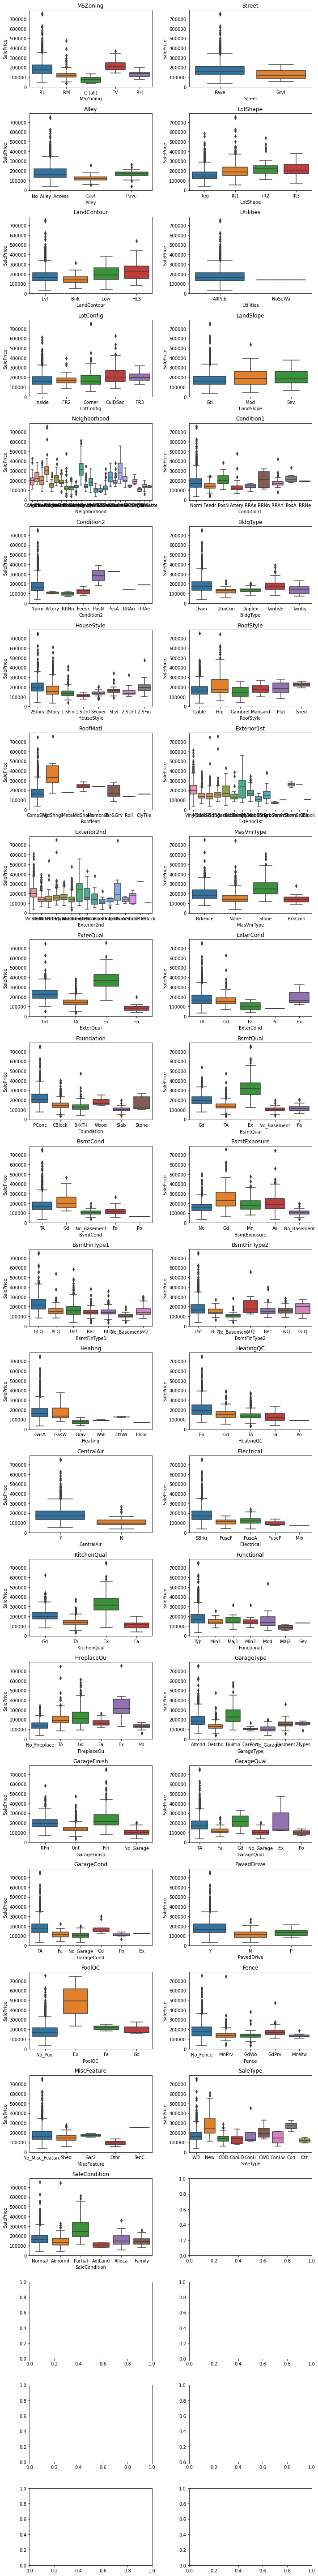

In [16]:
getBoxplots(trainCatCols, cleaned.train)

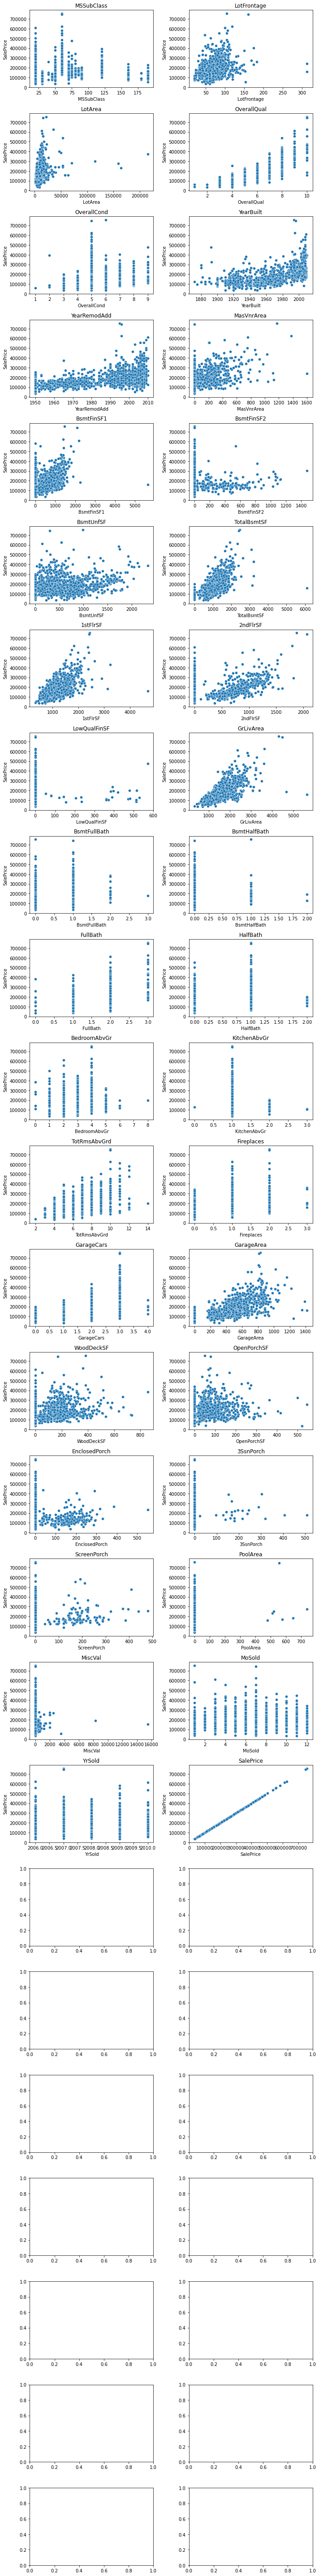

In [17]:
getScatterplots(trainNumCols, cleaned.train)

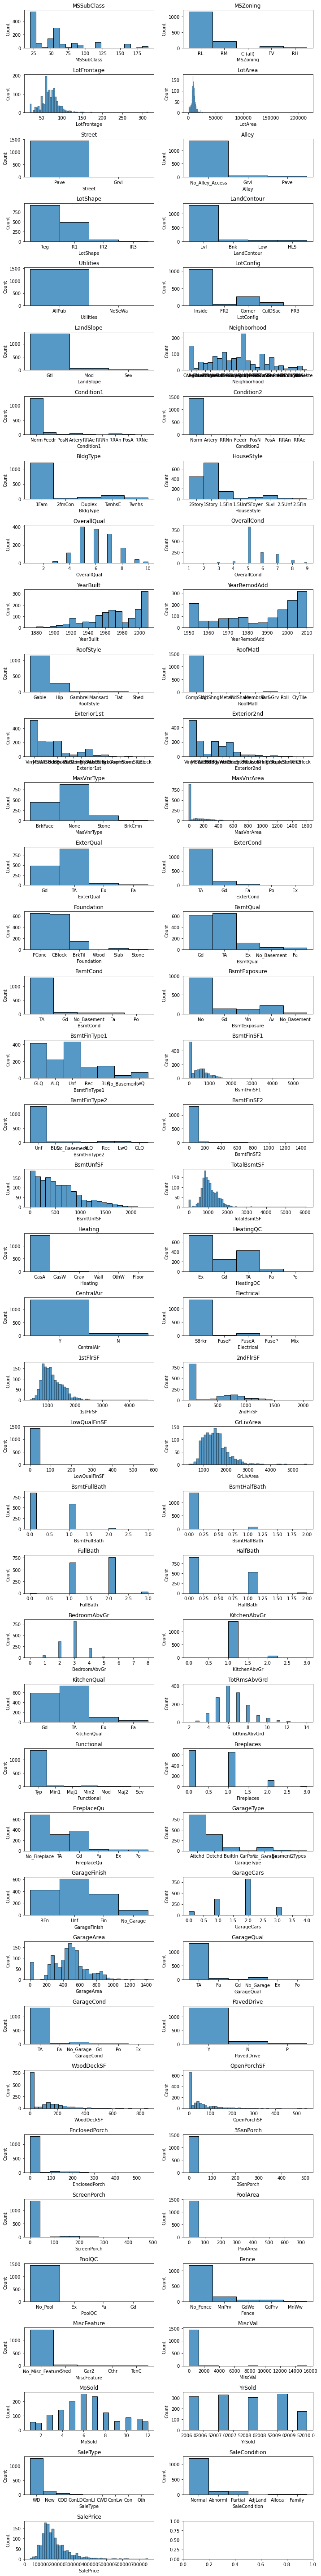

In [22]:
getHistograms(cleaned.train.columns, cleaned.train)

# Dummify Columns

In [ ]:
trained, tested = cleaned.dummify('')

In [ ]:
X = trained.loc[:, trained.columns != 'SalePrice']
y = trained['SalePrice']

In [ ]:
forest = RandomForestRegressor()
params = {'n_estimators': [100]}
grid = GridSearchCV(forest, param_grid=params, cv=5)
grid.fit(X, y)
grid.cv_results_

In [ ]:
grid.best_estimator_.feature_importances_

In [ ]:
def getFeatureImportance(num):
    grid.best_estimator_.feature_importances_
    X.columns.to_list()
    feature_importances = zip(X.columns.to_list(), grid.best_estimator_.feature_importances_)
    sorted_importance = sorted(list(feature_importances),key= lambda x: x[1],reverse=True)

    f, ax = plt.subplots(figsize=(13, 9))
    sns.barplot([x[0] for x in sorted_importance[:num]], [x[1] for x in sorted_importance[:num]])
    plt.xticks(rotation=90)

In [ ]:
getFeatureImportance(20)